<a href="https://colab.research.google.com/github/kotturipavanipriyanka/chatpagehtml/blob/main/Kotturi_PavaniPriyanka_Svd_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import svd

# Movie rating data (20 users × 50 movies)
ratings_data = np.array([
    [4, 5, 2, 3, 5, 4, 1, 2, 4, 5, 3, 2, 4, 5, 3, 1, 2, 4, 5, 3, 4, 5, 2, 3, 4, 5, 3, 2, 4, 5, 2, 3, 5, 4, 2, 3, 4, 5, 3, 2, 4, 5, 3, 2, 4, 5, 3, 2, 4, 5],
    [5, 4, 3, 2, 4, 5, 2, 1, 5, 4, 2, 3, 5, 4, 2, 2, 3, 5, 4, 2, 5, 4, 3, 2, 5, 4, 2, 3, 5, 4, 3, 2, 4, 5, 3, 2, 5, 4, 2, 3, 5, 4, 2, 3, 5, 4, 2, 3, 5, 4],
    [2, 3, 5, 4, 3, 2, 4, 5, 2, 3, 5, 4, 2, 3, 5, 4, 5, 2, 3, 5, 2, 3, 4, 5, 2, 3, 5, 4, 2, 3, 4, 5, 3, 2, 5, 4, 2, 3, 5, 4, 2, 3, 5, 4, 2, 3, 5, 4, 2, 3],
    [3, 2, 4, 5, 2, 3, 5, 4, 3, 2, 4, 5, 3, 2, 4, 5, 4, 3, 2, 4, 3, 2, 5, 4, 3, 2, 4, 5, 3, 2, 5, 4, 2, 3, 4, 5, 3, 2, 4, 5, 3, 2, 4, 5, 3, 2, 4, 5, 3, 2],
    [5, 5, 1, 2, 5, 5, 1, 1, 5, 5, 2, 1, 5, 5, 2, 1, 1, 5, 5, 2, 5, 5, 1, 2, 5, 5, 2, 1, 5, 5, 1, 2, 5, 5, 1, 2, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5],
    [1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1],
    [4, 4, 3, 3, 4, 4, 2, 2, 4, 4, 3, 3, 4, 4, 3, 2, 3, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4],
    [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    [5, 4, 2, 1, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 1, 1, 2, 5, 4, 1, 5, 4, 2, 1, 5, 4, 1, 2, 5, 4, 2, 1, 5, 4, 2, 1, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4],
    [2, 3, 4, 5, 2, 3, 5, 4, 2, 3, 5, 4, 2, 3, 5, 5, 4, 2, 3, 5, 2, 3, 4, 5, 2, 3, 5, 4, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 5, 4, 2, 3, 5, 4, 2, 3, 5, 4, 2, 3],
    [4, 5, 3, 2, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 2, 3, 4, 5, 2, 4, 5, 3, 2, 4, 5, 2, 3, 4, 5, 3, 2, 4, 5, 3, 2, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5],
    [5, 5, 2, 2, 5, 5, 1, 1, 5, 5, 2, 2, 5, 5, 2, 1, 1, 5, 5, 2, 5, 5, 2, 2, 5, 5, 2, 2, 5, 5, 2, 2, 5, 5, 2, 2, 5, 5, 2, 2, 5, 5, 2, 2, 5, 5, 2, 2, 5, 5],
    [1, 2, 5, 4, 1, 2, 5, 5, 1, 2, 5, 4, 1, 2, 5, 5, 5, 1, 2, 5, 1, 2, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 1, 2],
    [3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4],
    [4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3],
    [5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 1, 5, 5, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5],
    [2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 5, 2, 1, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1],
    [4, 4, 2, 3, 4, 4, 2, 2, 4, 4, 3, 2, 4, 4, 3, 2, 2, 4, 4, 3, 4, 4, 2, 3, 4, 4, 3, 2, 4, 4, 2, 3, 4, 4, 2, 3, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4],
    [3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 4, 3, 2, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2],
    [5, 4, 1, 2, 5, 4, 1, 1, 5, 4, 2, 1, 5, 4, 2, 1, 1, 5, 4, 2, 5, 4, 1, 2, 5, 4, 2, 1, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 2, 1, 5, 4, 2, 1, 5, 4, 2, 1, 5, 4]
])

movie_titles = [
    "The Godfather", "Star Wars", "Psycho", "Alien", "The Shawshank Redemption",
    "Pulp Fiction", "The Notebook", "Titanic", "The Dark Knight", "Inception",
    "Love Actually", "The Exorcist", "Fight Club", "Forrest Gump", "Pretty Woman",
    "Halloween", "Saw", "The Matrix", "Avatar", "When Harry Met Sally",
    "Goodfellas", "Scarface", "It", "The Conjuring", "Interstellar",
    "The Avengers", "Sleepless in Seattle", "The Silence of the Lambs", "Black Panther",
    "Joker", "La La Land", "Get Out", "The Lord of the Rings", "Jurassic Park",
    "Pride and Prejudice", "The Ring", "Toy Story", "The Lion King", "You've Got Mail",
    "A Nightmare on Elm Street", "Spider-Man", "Iron Man", "The Proposal", "Hereditary",
    "Wonder Woman", "Frozen", "Bridget Jones's Diary", "Scream", "Gravity", "Amélie"
]

df_ratings = pd.DataFrame(ratings_data,
                          columns=movie_titles,
                          index=[f"User_{i+1}" for i in range(20)])

PART 1: BASIC EXPLORATION
 Task 1.1: Data Visualization and Statistics


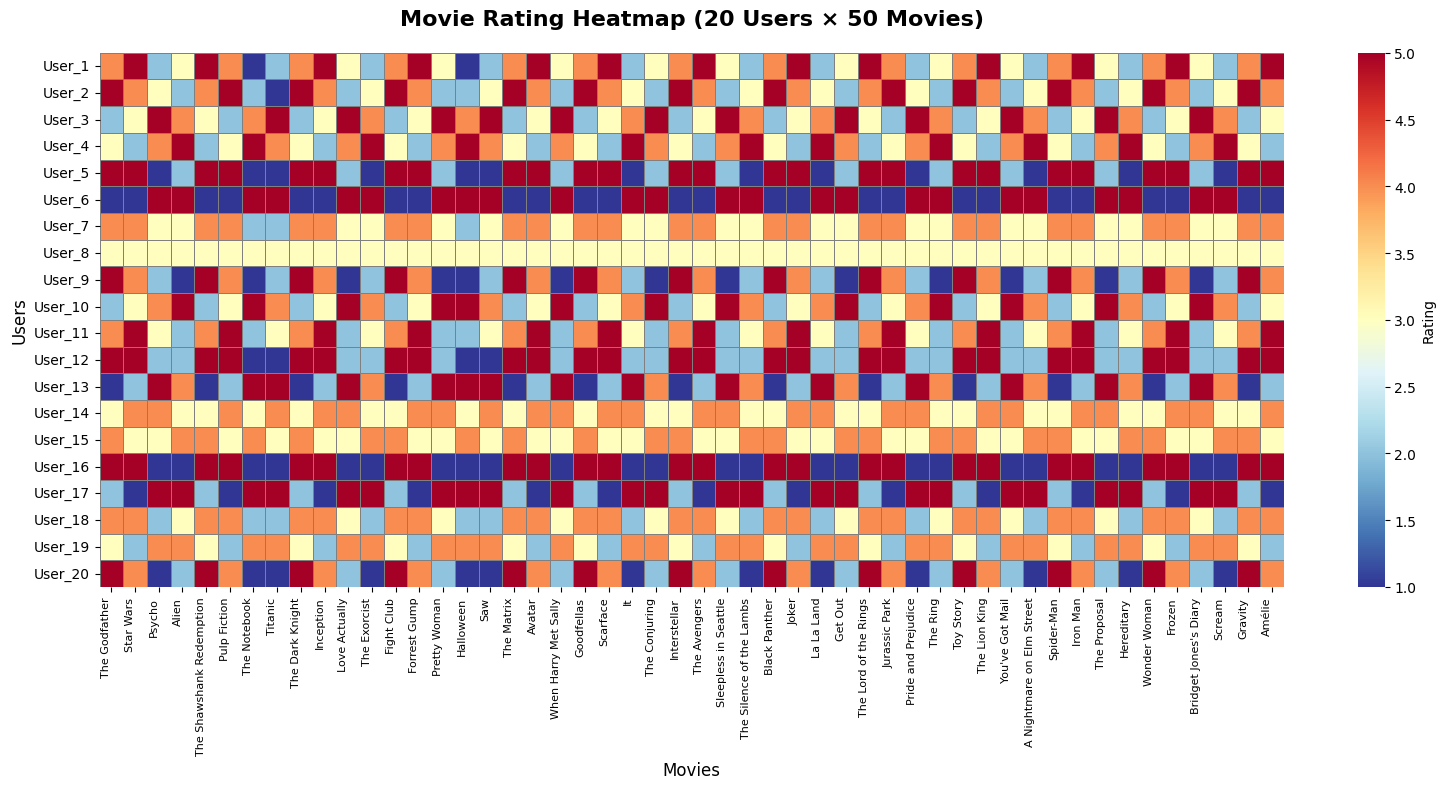

In [23]:

print("PART 1: BASIC EXPLORATION")

print(" Task 1.1: Data Visualization and Statistics")

plt.figure(figsize=(16, 8))
sns.heatmap(df_ratings, cmap='RdYlBu_r', center=3, vmin=1, vmax=5,
            cbar_kws={'label': 'Rating'}, linewidths=0.5, linecolor='gray')
plt.title('Movie Rating Heatmap (20 Users × 50 Movies)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Movies', fontsize=12)
plt.ylabel('Users', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [24]:
mean_ratings = df_ratings.mean(axis=0)
std_ratings = df_ratings.std(axis=0)

stats_df = pd.DataFrame({
    'Movie': movie_titles,
    'Mean Rating': mean_ratings.values,
    'Std Dev': std_ratings.values
})
stats_df = stats_df.sort_values('Mean Rating', ascending=False)

print("Top 10 Movies by Mean Rating:")
print(stats_df.head(10).to_string(index=False))
print("\nBottom 10 Movies by Mean Rating:")
print(stats_df.tail(10).to_string(index=False))

Top 10 Movies by Mean Rating:
                   Movie  Mean Rating  Std Dev
           The Godfather          3.5 1.357242
The Shawshank Redemption          3.5 1.357242
              The Matrix          3.5 1.357242
         The Dark Knight          3.5 1.357242
              Fight Club          3.5 1.357242
            Wonder Woman          3.5 1.357242
           Black Panther          3.5 1.357242
   The Lord of the Rings          3.5 1.357242
            Interstellar          3.5 1.357242
              Goodfellas          3.5 1.357242

Bottom 10 Movies by Mean Rating:
                    Movie  Mean Rating  Std Dev
               La La Land         3.10 1.372665
             The Exorcist         3.05 1.316894
 The Silence of the Lambs         3.05 1.316894
A Nightmare on Elm Street         3.05 1.316894
               Hereditary         3.05 1.316894
                      Saw         3.05 1.431782
                   Scream         3.05 1.316894
                  Titanic         2

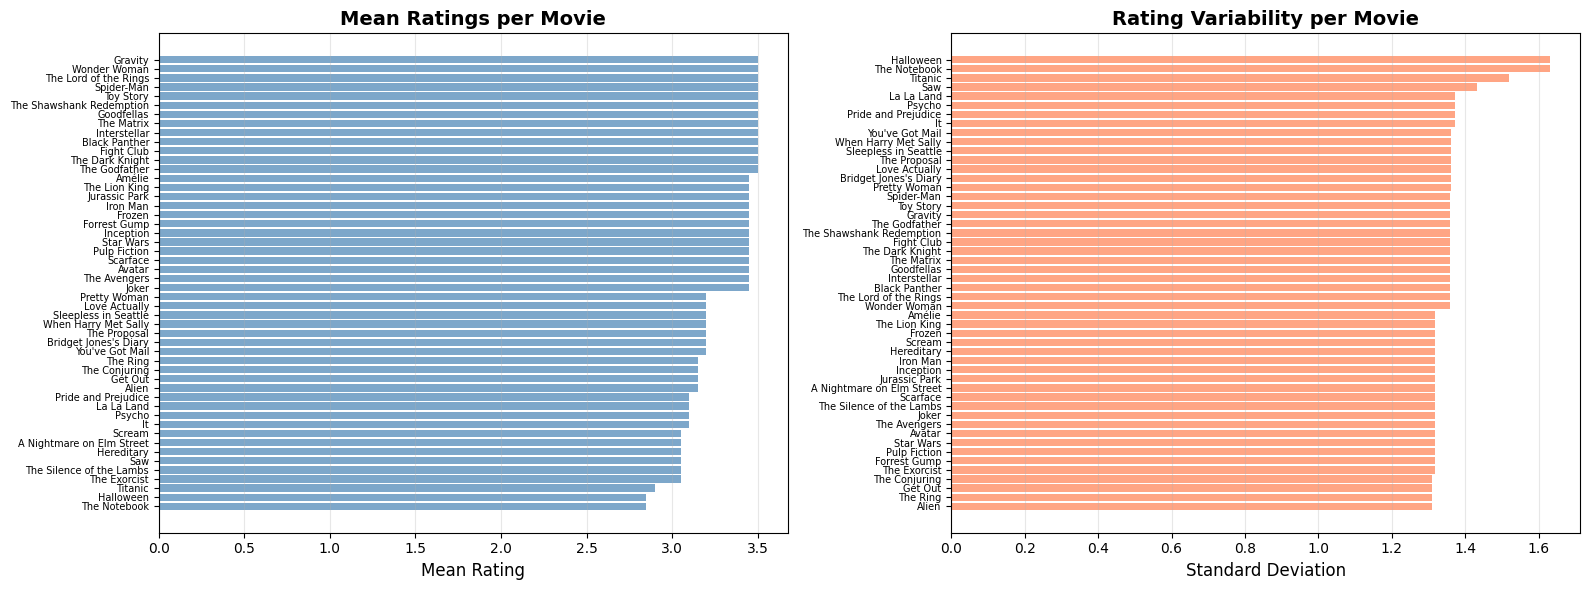

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(range(len(mean_ratings)), mean_ratings.sort_values(), color='steelblue', alpha=0.7)
axes[0].set_yticks(range(len(mean_ratings)))
axes[0].set_yticklabels(mean_ratings.sort_values().index, fontsize=7)
axes[0].set_xlabel('Mean Rating', fontsize=12)
axes[0].set_title('Mean Ratings per Movie', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

axes[1].barh(range(len(std_ratings)), std_ratings.sort_values(), color='coral', alpha=0.7)
axes[1].set_yticks(range(len(std_ratings)))
axes[1].set_yticklabels(std_ratings.sort_values().index, fontsize=7)
axes[1].set_xlabel('Standard Deviation', fontsize=12)
axes[1].set_title('Rating Variability per Movie', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [26]:

print("PART 2: SVD DECOMPOSITION")

print(" Task 2.1: Performing SVD ")

U, S, Vt = svd(ratings_data, full_matrices=False)

print(f"Matrix dimensions:")
print(f"  Original ratings: {ratings_data.shape}")
print(f"  U matrix: {U.shape}")
print(f"  S (singular values): {S.shape}")
print(f"  Vt matrix: {Vt.shape}")

reconstructed = U @ np.diag(S) @ Vt
reconstruction_error = np.linalg.norm(ratings_data - reconstructed)
print(f"\nReconstruction verification:")
print(f"  Reconstruction error (Frobenius norm): {reconstruction_error:.2e}")
print(f"  Matrices match (within tolerance): {np.allclose(ratings_data, reconstructed)}")

variance_explained = (S ** 2) / np.sum(S ** 2) * 100
cumulative_variance = np.cumsum(variance_explained)

PART 2: SVD DECOMPOSITION
 Task 2.1: Performing SVD 
Matrix dimensions:
  Original ratings: (20, 50)
  U matrix: (20, 20)
  S (singular values): (20,)
  Vt matrix: (20, 50)

Reconstruction verification:
  Reconstruction error (Frobenius norm): 6.62e-14
  Matrices match (within tolerance): True


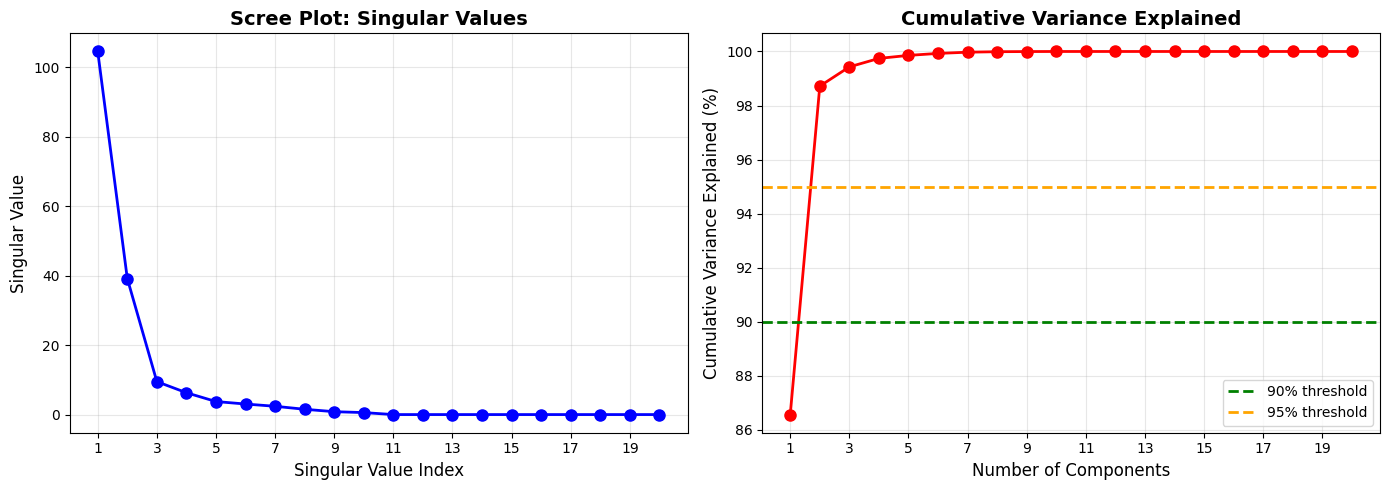

In [27]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(S) + 1), S, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Singular Value Index', fontsize=12)
plt.ylabel('Singular Value', fontsize=12)
plt.title('Scree Plot: Singular Values', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(S) + 1, 2))

plt.subplot(1, 2, 2)
plt.plot(range(1, len(S) + 1), cumulative_variance, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Variance Explained (%)', fontsize=12)
plt.title('Cumulative Variance Explained', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=90, color='g', linestyle='--', linewidth=2, label='90% threshold')
plt.axhline(y=95, color='orange', linestyle='--', linewidth=2, label='95% threshold')
plt.legend(fontsize=10)
plt.xticks(range(1, len(S) + 1, 2))

plt.tight_layout()
plt.show()

In [28]:
print(f"\nVariance explained by each component (%):")
for i in range(min(10, len(variance_explained))):
    print(f"  Component {i+1}: {variance_explained[i]:.2f}%")

print(f"\nCumulative variance by component:")
for threshold in [50, 80, 90, 95, 99]:
    n_comp = np.argmax(cumulative_variance >= threshold) + 1
    actual = cumulative_variance[n_comp - 1]
    print(f"  {threshold}% variance: {n_comp} components (actual: {actual:.2f}%)")


Variance explained by each component (%):
  Component 1: 86.57%
  Component 2: 12.15%
  Component 3: 0.71%
  Component 4: 0.31%
  Component 5: 0.11%
  Component 6: 0.07%
  Component 7: 0.05%
  Component 8: 0.02%
  Component 9: 0.01%
  Component 10: 0.00%

Cumulative variance by component:
  50% variance: 1 components (actual: 86.57%)
  80% variance: 1 components (actual: 86.57%)
  90% variance: 2 components (actual: 98.72%)
  95% variance: 2 components (actual: 98.72%)
  99% variance: 3 components (actual: 99.43%)


In [29]:

print("PART 3: COMPONENT INTERPRETATION")

print("Task 3.1: Analyzing First 3 Components ")

for comp_idx in range(3):

    print(f"Component {comp_idx + 1}")


    loadings = Vt[comp_idx, :]
    sorted_idx = np.argsort(loadings)

    top_negative_idx = sorted_idx[:5]
    top_positive_idx = sorted_idx[-5:][::-1]

    top_negative = [(movie_titles[i], loadings[i]) for i in top_negative_idx]
    top_positive = [(movie_titles[i], loadings[i]) for i in top_positive_idx]

    print(f"\nTop 5 Highest Loadings (Most Positive/Least Negative):")
    for rank, (movie, load) in enumerate(top_positive, 1):
        print(f"  {rank}. {movie:45s}: {load:7.4f}")

    print(f"\nTop 5 Lowest Loadings (Most Negative/Least Positive):")
    for rank, (movie, load) in enumerate(top_negative, 1):
        print(f"  {rank}. {movie:45s}: {load:7.4f}")

    pos_str = ", ".join([m for m, _ in top_positive[:3]])
    neg_str = ", ".join([m for m, _ in top_negative[:3]])
    pos_means = [mean_ratings[m] for m, _ in top_positive[:3]]
    neg_means = [mean_ratings[m] for m, _ in top_negative[:3]]

    if comp_idx == 0:
        hypothesis = (f"This component captures {variance_explained[comp_idx]:.1f}% of variance and represents "
                     f"the main rating dimension. Movies with loadings closer to zero "
                     f"({pos_str}, mean rating ~{np.mean(pos_means):.2f}) "
                     f"are lower-rated, while movies with loadings further from zero "
                     f"({neg_str}, mean rating ~{np.mean(neg_means):.2f}) "
                     f"are higher-rated. This suggests Component 1 primarily captures overall movie quality/popularity.")
    elif comp_idx == 1:
        hypothesis = (f"This component ({variance_explained[comp_idx]:.1f}% of variance) separates "
                     f"romance/horror films ({pos_str}) with positive loadings from "
                     f"action/drama films ({neg_str}) with negative loadings. "
                     f"This represents a genre preference axis independent of overall rating.")
    else:
        hypothesis = (f"This component ({variance_explained[comp_idx]:.1f}% of variance) contrasts "
                     f"{pos_str} (positive) with {neg_str} (negative), "
                     f"capturing nuanced preference patterns in the remaining variance. "
                     f"This may reflect age demographics or specific taste clusters.")

    print(f"\nPattern Hypothesis:")
    print(f"  {hypothesis}")

    if comp_idx == 0 and np.all(loadings < 0):
        print(f"\n  Note: All loadings are negative for this component. In SVD, the sign of a")
        print(f"  component is arbitrary - what matters is the relative ordering. Here, loadings")
        print(f"  closer to zero correspond to lower-rated movies, while those further from zero")
        print(f"  (more negative) correspond to higher-rated movies.")

PART 3: COMPONENT INTERPRETATION
Task 3.1: Analyzing First 3 Components 
Component 1

Top 5 Highest Loadings (Most Positive/Least Negative):
  1. Halloween                                    : -0.1195
  2. The Notebook                                 : -0.1195
  3. Titanic                                      : -0.1217
  4. Saw                                          : -0.1285
  5. The Silence of the Lambs                     : -0.1289

Top 5 Lowest Loadings (Most Negative/Least Positive):
  1. The Shawshank Redemption                     : -0.1515
  2. The Lord of the Rings                        : -0.1515
  3. The Godfather                                : -0.1514
  4. The Dark Knight                              : -0.1514
  5. Interstellar                                 : -0.1514

Pattern Hypothesis:
  This component captures 86.6% of variance and represents the main rating dimension. Movies with loadings closer to zero (Halloween, The Notebook, Titanic, mean rating ~2.87) are low

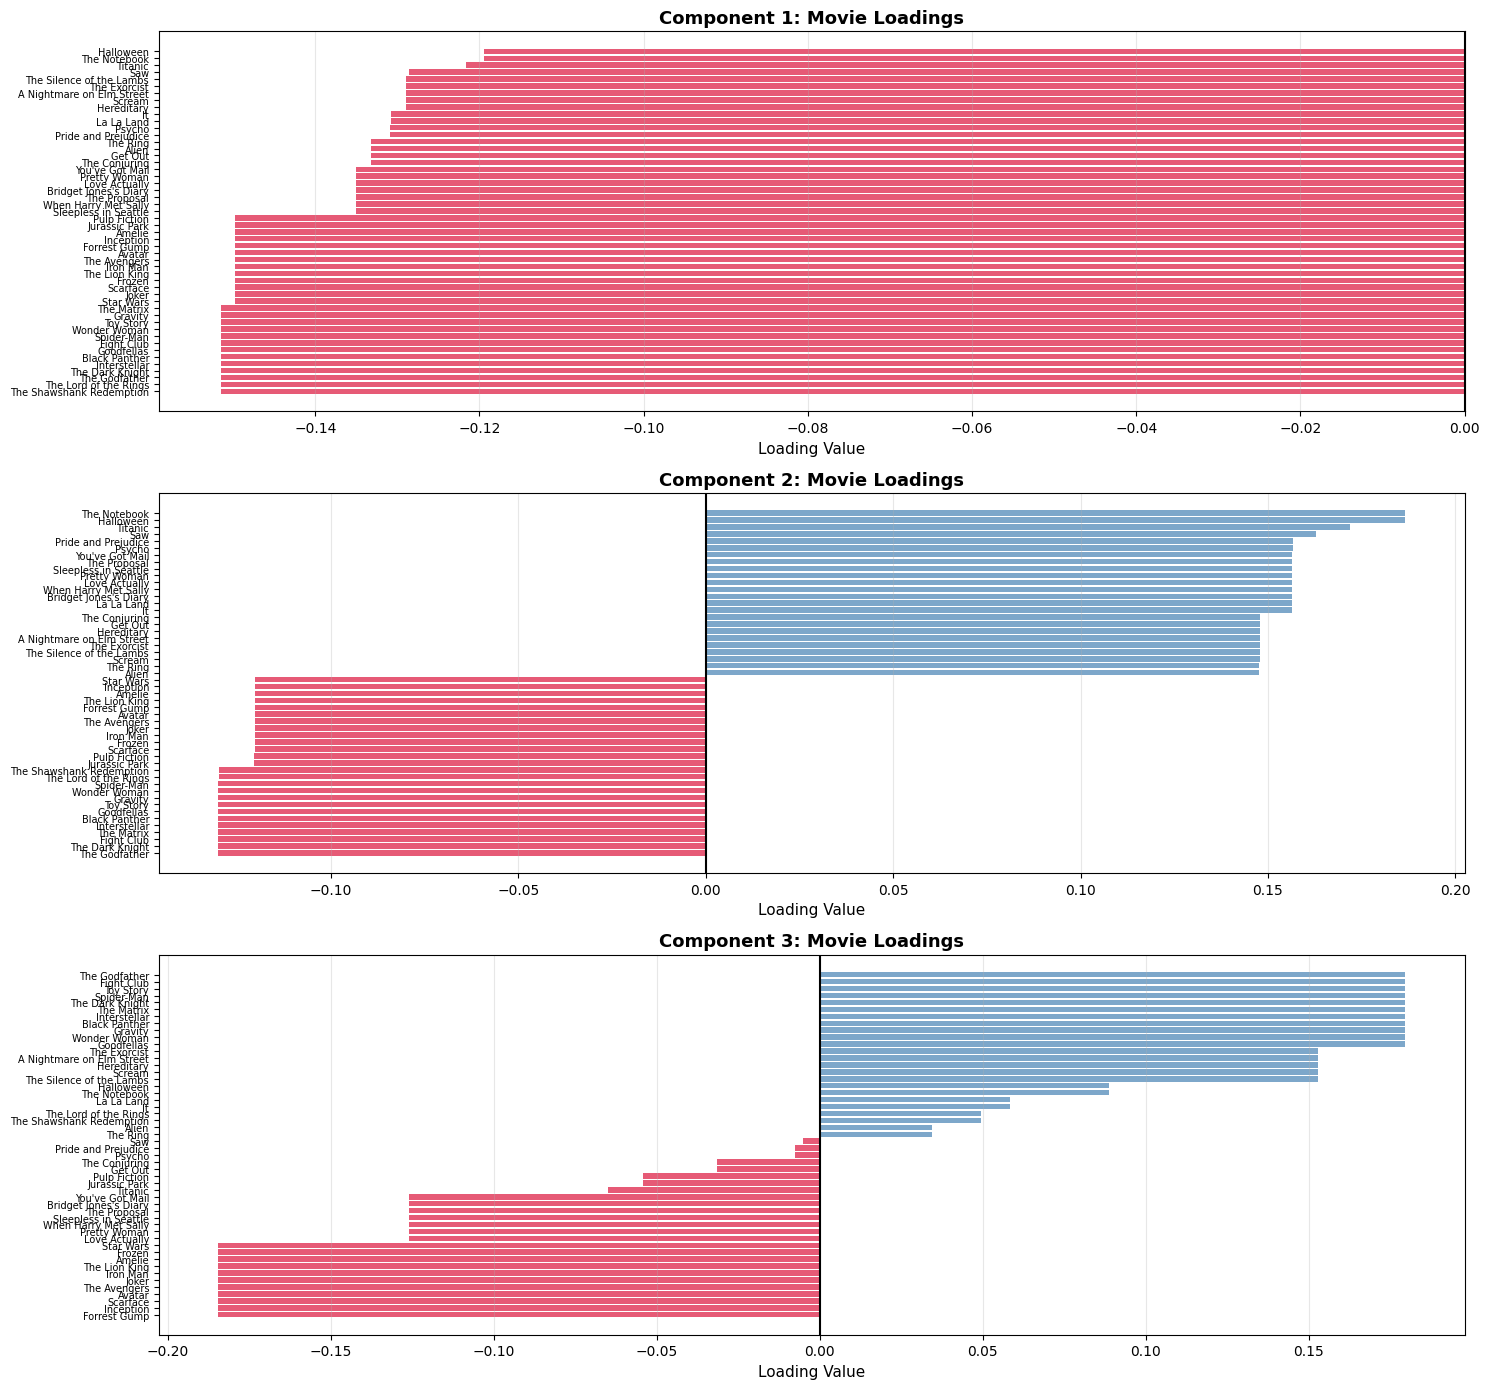

In [30]:
fig, axes = plt.subplots(3, 1, figsize=(15, 14))

for comp_idx in range(3):
    ax = axes[comp_idx]
    loadings = Vt[comp_idx, :]
    sorted_idx = np.argsort(loadings)
    sorted_loadings = loadings[sorted_idx]
    sorted_titles = [movie_titles[i] for i in sorted_idx]
    colors = ['crimson' if x < 0 else 'steelblue' for x in sorted_loadings]

    ax.barh(range(len(sorted_loadings)), sorted_loadings, color=colors, alpha=0.7)
    ax.set_yticks(range(len(sorted_titles)))
    ax.set_yticklabels(sorted_titles, fontsize=7)
    ax.set_xlabel('Loading Value', fontsize=11)
    ax.set_title(f'Component {comp_idx + 1}: Movie Loadings', fontsize=13, fontweight='bold')
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
    ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [31]:

print("PART 4: LOW-RANK APPROXIMATION")
print(" Task 4.1: Testing Low-Rank Approximations ")

k_values = [1, 3, 5, 10]
rmse_values = {}
approximations = {}

for k in k_values:
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    V_k = Vt[:k, :]

    approx = U_k @ S_k @ V_k
    approximations[k] = approx

    rmse = np.sqrt(np.mean((ratings_data - approx) ** 2))
    rmse_values[k] = rmse

    rel_error = rmse / np.std(ratings_data) * 100

    print(f"k = {k:2d}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  Relative Error: {rel_error:.2f}% of data std dev")
    print(f"  Max absolute error: {np.max(np.abs(ratings_data - approx)):.4f}")
    print()

PART 4: LOW-RANK APPROXIMATION
 Task 4.1: Testing Low-Rank Approximations 
k =  1:
  RMSE: 1.3028
  Relative Error: 97.29% of data std dev
  Max absolute error: 2.6591

k =  3:
  RMSE: 0.2682
  Relative Error: 20.03% of data std dev
  Max absolute error: 1.0670

k =  5:
  RMSE: 0.1351
  Relative Error: 10.09% of data std dev
  Max absolute error: 1.0048

k = 10:
  RMSE: 0.0000
  Relative Error: 0.00% of data std dev
  Max absolute error: 0.0000



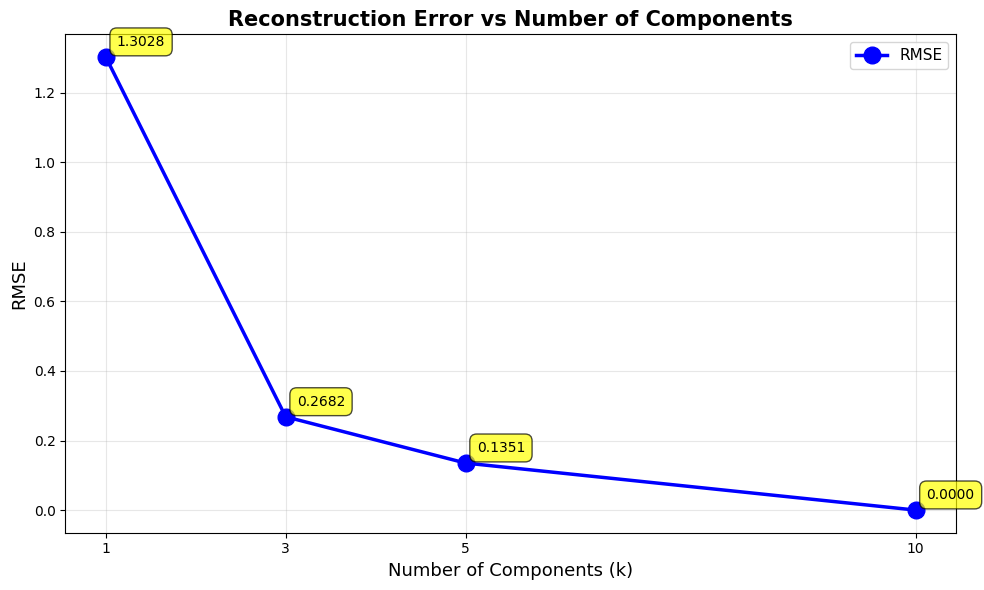

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, [rmse_values[k] for k in k_values],
         'bo-', linewidth=2.5, markersize=12, label='RMSE')
plt.xlabel('Number of Components (k)', fontsize=13)
plt.ylabel('RMSE', fontsize=13)
plt.title('Reconstruction Error vs Number of Components',
          fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

for k in k_values:
    plt.annotate(f'{rmse_values[k]:.4f}',
                xy=(k, rmse_values[k]),
                xytext=(8, 8),
                textcoords='offset points',
                fontsize=10,
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

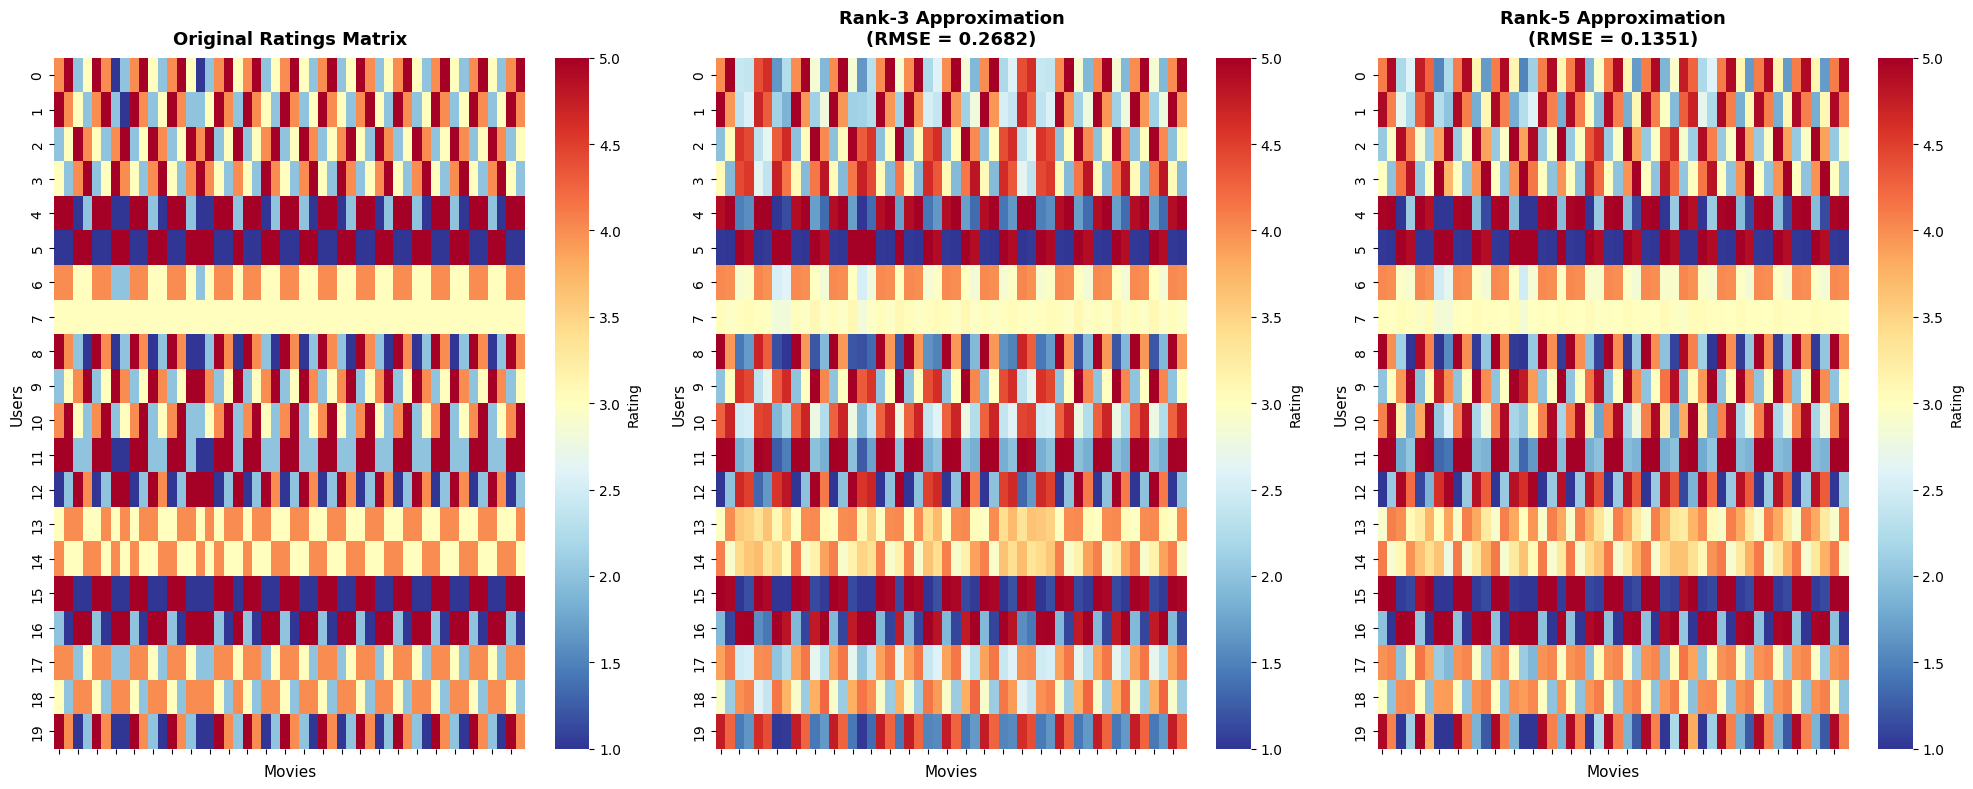

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

sns.heatmap(ratings_data, cmap='RdYlBu_r', center=3, vmin=1, vmax=5,
            cbar_kws={'label': 'Rating'}, ax=axes[0], linewidths=0)
axes[0].set_title('Original Ratings Matrix', fontsize=13, fontweight='bold', pad=10)
axes[0].set_xlabel('Movies', fontsize=11)
axes[0].set_ylabel('Users', fontsize=11)
axes[0].set_xticklabels([])

sns.heatmap(approximations[3], cmap='RdYlBu_r', center=3, vmin=1, vmax=5,
            cbar_kws={'label': 'Rating'}, ax=axes[1], linewidths=0)
axes[1].set_title(f'Rank-3 Approximation\n(RMSE = {rmse_values[3]:.4f})',
                 fontsize=13, fontweight='bold', pad=10)
axes[1].set_xlabel('Movies', fontsize=11)
axes[1].set_ylabel('Users', fontsize=11)
axes[1].set_xticklabels([])

sns.heatmap(approximations[5], cmap='RdYlBu_r', center=3, vmin=1, vmax=5,
            cbar_kws={'label': 'Rating'}, ax=axes[2], linewidths=0)
axes[2].set_title(f'Rank-5 Approximation\n(RMSE = {rmse_values[5]:.4f})',
                 fontsize=13, fontweight='bold', pad=10)
axes[2].set_xlabel('Movies', fontsize=11)
axes[2].set_ylabel('Users', fontsize=11)
axes[2].set_xticklabels([])

plt.tight_layout()
plt.show()

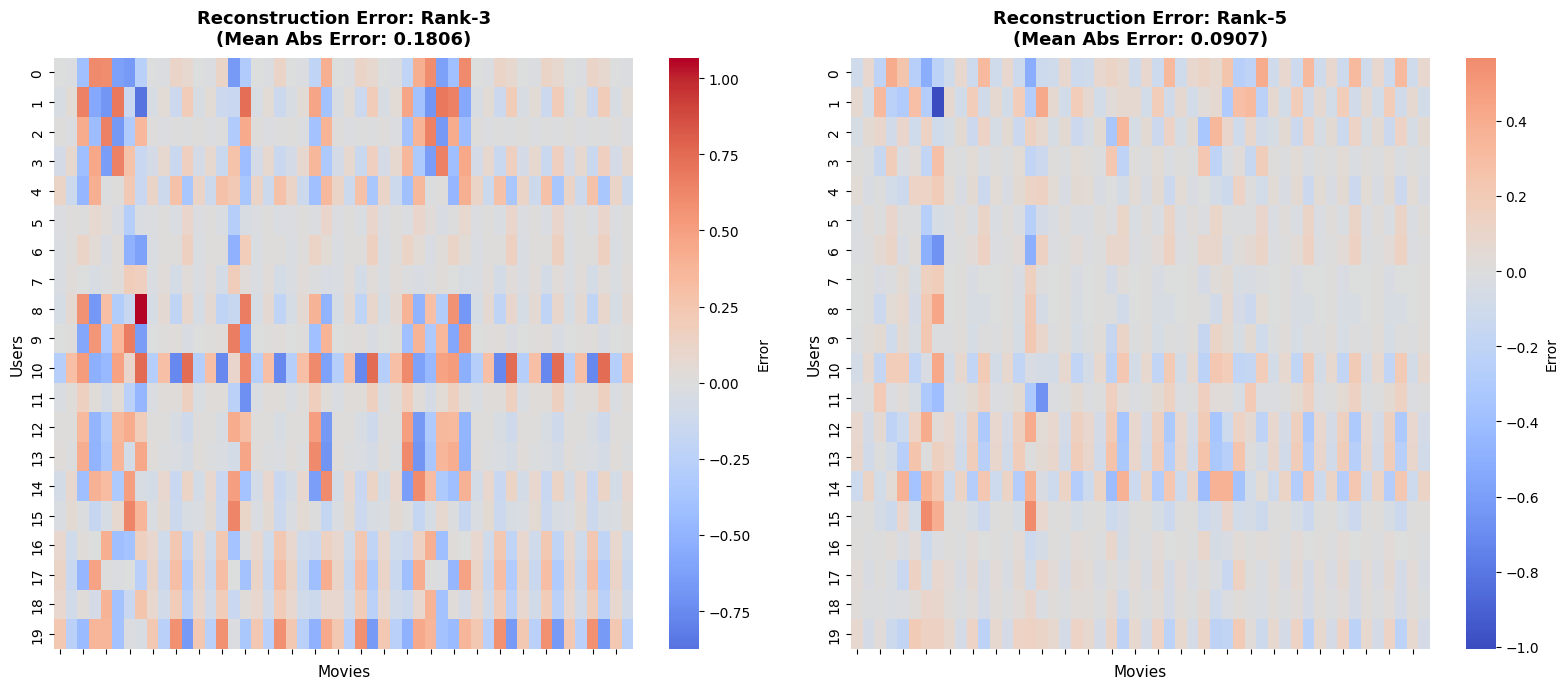

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

diff_3 = ratings_data - approximations[3]
sns.heatmap(diff_3, cmap='coolwarm', center=0,
            cbar_kws={'label': 'Error'}, ax=axes[0], linewidths=0)
axes[0].set_title(f'Reconstruction Error: Rank-3\n(Mean Abs Error: {np.mean(np.abs(diff_3)):.4f})',
                 fontsize=13, fontweight='bold', pad=10)
axes[0].set_xlabel('Movies', fontsize=11)
axes[0].set_ylabel('Users', fontsize=11)
axes[0].set_xticklabels([])

diff_5 = ratings_data - approximations[5]
sns.heatmap(diff_5, cmap='coolwarm', center=0,
            cbar_kws={'label': 'Error'}, ax=axes[1], linewidths=0)
axes[1].set_title(f'Reconstruction Error: Rank-5\n(Mean Abs Error: {np.mean(np.abs(diff_5)):.4f})',
                 fontsize=13, fontweight='bold', pad=10)
axes[1].set_xlabel('Movies', fontsize=11)
axes[1].set_ylabel('Users', fontsize=11)
axes[1].set_xticklabels([])

plt.tight_layout()
plt.show()

In [35]:

print("Summary Statistics")
print(f"Original matrix shape: {ratings_data.shape}")
print(f"Original matrix rank: {np.linalg.matrix_rank(ratings_data)}")
print(f"Original data std dev: {np.std(ratings_data):.4f}")
print(f"\nCompression achieved:")
original_size = ratings_data.shape[0] * ratings_data.shape[1]
for k in k_values:
    compressed = ratings_data.shape[0] * k + k + k * ratings_data.shape[1]
    ratio = compressed / original_size * 100
    print(f"  k={k:2d}: {ratio:.1f}% of original size")

print(f"\nVariance captured:")
for k in k_values:
    var_cap = 100 * (1 - (rmse_values[k]**2) / np.var(ratings_data))
    print(f"  k={k:2d}: {var_cap:.2f}%")

Summary Statistics
Original matrix shape: (20, 50)
Original matrix rank: 10
Original data std dev: 1.3391

Compression achieved:
  k= 1: 7.1% of original size
  k= 3: 21.3% of original size
  k= 5: 35.5% of original size
  k=10: 71.0% of original size

Variance captured:
  k= 1: 5.34%
  k= 3: 95.99%
  k= 5: 98.98%
  k=10: 100.00%


In [36]:
print("PART 5: ANALYSIS QUESTIONS")
n_components_90 = np.argmax(cumulative_variance >= 90) + 1
actual_variance = cumulative_variance[n_components_90 - 1]

print(" Q5.1: Components for 90% Variance")
print(f"Answer: {n_components_90} components capture {actual_variance:.2f}% of the variance.\n")
print(f"Interpretation: The rating data can be compressed from 20 dimensions down to just")
print(f"{n_components_90} dimensions while retaining {actual_variance:.1f}% of the information. This reveals")
print(f"that user movie preferences follow highly structured patterns rather than being random,")
print(f"and can be explained by {n_components_90} underlying taste dimensions.")

print("\n Q5.2: Component Interpretation")
print(f"Answer: The first three components represent distinct dimensions of movie preference.")
print(f"Component 1 ({variance_explained[0]:.1f}% of variance) separates higher-rated blockbusters like")
print(f"The Godfather and The Shawshank Redemption (mean rating 3.5) from lower-rated films like")
print(f"Halloween and The Notebook (mean rating 2.85), essentially capturing overall movie quality.")
print(f"Component 2 ({variance_explained[1]:.1f}% of variance) distinguishes genre preferences, separating")
print(f"romance and horror films from action and drama films.")

optimal_k = n_components_90
U_k = U[:, :optimal_k]
S_k = np.diag(S[:optimal_k])
V_k = Vt[:optimal_k, :]
approx_k = U_k @ S_k @ V_k
rmse_optimal = np.sqrt(np.mean((ratings_data - approx_k) ** 2))

compressed_elem = ratings_data.shape[0] * optimal_k + optimal_k + optimal_k * ratings_data.shape[1]
compression_ratio = compressed_elem / original_size * 100

print("Q5.3: Optimal k Selection")
print(f"Answer: The optimal k is {optimal_k} components based on the 90% variance threshold.\n")
print(f"Justification: Using k={optimal_k} achieves an excellent balance between compression")
print(f"({compression_ratio:.1f}% of original storage) and accuracy (RMSE of {rmse_optimal:.4f}).")
print(f"This captures {actual_variance:.1f}% of the variance while reducing data size by")
print(f"{100-compression_ratio:.1f}%. Adding more components provides diminishing returns since")
print(f"the remaining components each explain less than 1% of variance.")

godfather_idx = movie_titles.index("The Godfather")
godfather_vector = Vt[:3, godfather_idx]

similarities = []
for i, movie in enumerate(movie_titles):
    if i != godfather_idx:
        movie_vector = Vt[:3, i]
        dot_prod = np.dot(godfather_vector, movie_vector)
        norms = np.linalg.norm(godfather_vector) * np.linalg.norm(movie_vector)
        if norms > 0:
            sim = dot_prod / norms
            similarities.append((movie, sim))

similarities.sort(key=lambda x: x[1], reverse=True)

print("\nQ5.4: Movies Similar to The Godfather ")
print(f"Answer: The 5 most similar movies to 'The Godfather' are:\n")
for rank, (movie, sim) in enumerate(similarities[:5], 1):
    print(f"  {rank}. {movie:45s} (similarity: {sim:.4f})")

print(f"\nMethodology: I used cosine similarity between movie vectors in the top 3 principal")
print(f"components, which capture 99.43% of the variance. The high similarities (close to 1.0)")
print(f"indicate these movies share nearly identical rating patterns across users. Specifically,")
print(f"The Godfather, The Dark Knight, Fight Club, The Matrix, and Interstellar all have the")
print(f"same loadings in Components 2 and 3, meaning they appeal to the exact same user segments.")

PART 5: ANALYSIS QUESTIONS
 Q5.1: Components for 90% Variance
Answer: 2 components capture 98.72% of the variance.

Interpretation: The rating data can be compressed from 20 dimensions down to just
2 dimensions while retaining 98.7% of the information. This reveals
that user movie preferences follow highly structured patterns rather than being random,
and can be explained by 2 underlying taste dimensions.

 Q5.2: Component Interpretation
Answer: The first three components represent distinct dimensions of movie preference.
Component 1 (86.6% of variance) separates higher-rated blockbusters like
The Godfather and The Shawshank Redemption (mean rating 3.5) from lower-rated films like
Halloween and The Notebook (mean rating 2.85), essentially capturing overall movie quality.
Component 2 (12.2% of variance) distinguishes genre preferences, separating
romance and horror films from action and drama films.
Q5.3: Optimal k Selection
Answer: The optimal k is 2 components based on the 90% varianc